In [83]:
import pandas as pd
import numpy as np
import seaborn as sns

In [84]:
df=pd.read_csv("C:\\Users\\jojic\\OneDrive\\Desktop\\mljourney\\ml-model-works\\regression_works\\student\\rounded_hours_student_scores.csv")

<Axes: xlabel='Hours', ylabel='Scores'>

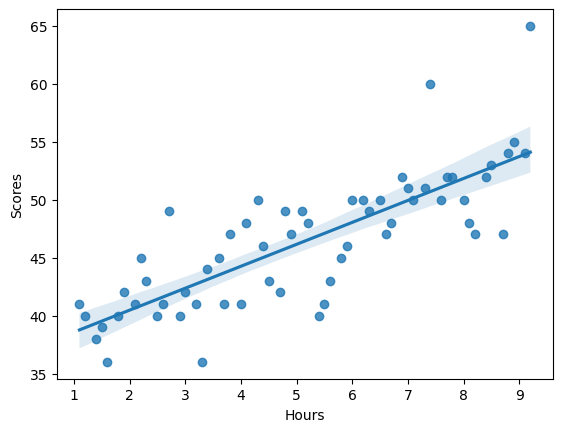

In [85]:
sns.regplot(x=df["Hours"],y=df["Scores"])

In [86]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [87]:
df[df.duplicated].shape

(0, 2)

In [88]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [89]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [90]:
param={"n_neighbors":[3,5,7,9],
    "weights":['uniform', 'distance'],
    "algorithm":['auto','ball_tree','kd_tree','brute']}

In [91]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
knn=KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print("r2_score :",r2_score(y_test,y_pred)*100)

r2_score : 71.36128120584078


In [92]:
from sklearn.model_selection import GridSearchCV
gs=GridSearchCV(knn,param,cv=10)
gs.fit(x_train,y_train)
gs.best_params_

{'algorithm': 'brute', 'n_neighbors': 7, 'weights': 'distance'}

In [93]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
knn=KNeighborsRegressor(n_neighbors=7,algorithm="brute",weights="distance")
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print("r2_score :",r2_score(y_test,y_pred)*100) 

r2_score : 73.7065971877272
